# Dev Week 2017 - Machine Learning & Recommender Systems

This talk will present to you some basic concepts about Machine Learning and how we develop projects using this concept and related technologies (IMHO).

## Fundamentals of Machine Learning

### Some important points that we must keep in mind for this talk

In terms of concept size: 
- Data Science and AI concepts is bigger than Machine Learning;
- Machine Learning concept is bigger than Deep Learning;

### What is learning?

- Using past experiences to acquire expertise in execute a specific task;
- Do you wanna an example? Pretend to grab a stone from ground near a street dog!

### What is machine learning?

- When you program a machine to learn how to execute a specific task;
- The old but gold example of filtering Spams;

### Types of learning

#### Supervised versus Unsupervised

*Supervised:* when you learn from a targeted amount of data how to target another amount of data;

*Unsupervised:* no targets;

### Classification, regression, multiclass, ranking and complex predictions

*Simple (binary) classification:* you have two classes and a new sample must fit one of the two classes;

*Regression:* you must to predict a continuous value for your new samples;

*Multi classification:* you have more than two classes;

*Ranking:* You must order a set of instances by relevance;

*Complex prediction:* As an example, cost sensitive classification;

#### Active versus Passive learners

About how the learner interacts with the environment at training time. If actively performs interactions (A/B tests, questions, etc.) or wait for another actor to bring to learnship.

#### Online versus batch learning

The frequency and/or lifecycle of when your learner incorporates the learnship;

### Overfitting

- When your predictor performance on the training set is excellent, yet its performance on the ground truth is very poor;
- In other words, occurs when your hypothesis fits the training data "too well";

### Bias

- When you inducts your learn to a specific "conclusion";
- Be CAREFUL with assumptions;

> "In the face of ambiguity, refuse the temptation to guess." (The Zen of Python, by Tim Peters)

### Algorithms types

- Linear regression;
- Support Vector Machines;
- Decision trees;
- Ensembles;
- Neural networks;
- etc...

## Connecting Machine Learning to a business goal

### Goals and metrics

In successful Machine Learning projects, the intelligence being developed is strongly coupled to a very specific goal and measured by a very specific metric. So:

- Always define the goal and metric before the development kick-off
- Plan and architect your Machine Learning strategy over the goal and metric previously defined
- Use goal and metric to measure the performance of your intelligence

### Data domains

- A data domain are the group of datasets that compose the available description of your context and its players and events;
- For example, if you have an e-commerce, your data domain is all data **available** that describes your customers, the products being selled, financial transactions, etc.
- Two different data domains can have distinct definitions of the same player or event. Wanna an example? CHURN!

In [1]:
from sklearn import datasets

import pandas as pd

In [2]:
bc = datasets.load_breast_cancer()
features = pd.DataFrame(bc.data, columns=bc.feature_names)
targets = bc.target

features.head().transpose()

,0,1,2,3,4
mean radius,17.990000,20.570000,19.690000,11.420000,20.290000
mean texture,10.380000,17.770000,21.250000,20.380000,14.340000
mean perimeter,122.800000,132.900000,130.000000,77.580000,135.100000
mean area,1001.000000,1326.000000,1203.000000,386.100000,1297.000000
mean smoothness,0.118400,0.084740,0.109600,0.142500,0.100300
mean compactness,0.277600,0.078640,0.159900,0.283900,0.132800
mean concavity,0.300100,0.086900,0.197400,0.241400,0.198000
mean concave points,0.147100,0.070170,0.127900,0.105200,0.104300
mean symmetry,0.241900,0.181200,0.206900,0.259700,0.180900
mean fractal dimension,0.078710,0.056670,0.059990,0.097440,0.058830


In [3]:
features.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


### Offline evaluation framework

The offline evaluation framework is the **ruler** that you will use to measure the performance of your model based on your business goals.

For example, suppose you are the manager of a Breast Cancer campaign and you should chose between a more greedy approach or a highly assertive one based on the cost of the approach. The error costs of your campaign are:

- A False Negative (your model does not identify a case which is Breast Cancer) is US\$ 15000,00 to take a late treatment;
- A False Positive (your model classify as Cancer a case that actually is not) is US\$ 3000,00

- A True Positive (your model classifiy as Cancer a real case of Cancer) saves US\$ 7000,00 from government

- A True Negative (your model classify as not Cancer a real case of not Cancer) doesn't impact the costs

In [4]:
FN_COST = 15000
FP_COST = 3000
TP_COST = -7000
TN_COST = 0

def operation_cost(num_fn, num_fp, num_tp, num_tn):
    return (num_fn * FN_COST) + (num_fp * FP_COST) + (num_tp * TP_COST) + (num_tn * TN_COST)

## Feature engineering & data quality

### Features types

- Numeric value (int or float)
    - Normalization
- Categorical values (classes not necessarially exclusive)
    - Dummy variables, feature hashing
- Boolean values (true of false, 1 or 0)

### Missing values

You must to make a choice about the missing (`NULL`) values within your dataset:
- Drop them
- Fill them with some standard value
    - Zero
    - Average
    - Median
    - etc.
- Be careful with BIAS, _mtf_!

In [6]:
df_missing = features.sample(frac=0.1)
df_missing.fillna(0.0)
_ = df_missing.dropna()

### Classes balancing
- Sometimes your dataset has a huge proportion between positive and negative classes
- This kind of situation screws up with the algorithm learning because it is very hard to detect the behavior / characteristics of the minor class
- There are some techniques to rebalance the data **for the training step**
    - SMOTE is a good one to get started

In [7]:
print "Number of POSITIVE cases: {}".format(targets[targets == 1].shape[0])
print "Number of NEGATIVE cases: {}".format(targets[targets == 0].shape[0])

Number of POSITIVE cases: 357
Number of NEGATIVE cases: 212


### Dimensionality analysis

- In datasets with so many features you will face some performance issues: more data available, more data to process
- There are some techniques to reduce the dimensionality of your dataset without exclude by relevance or major losses of information
    - Get started with PCA

In [8]:
from sklearn.decomposition import PCA

Number of features available in our dataset

In [9]:
features.shape

(569, 30)

Reducing to a bi-dimensional vector space:

In [10]:
pca = PCA(n_components=2)
pca.fit(features)

PCA(copy=True, n_components=2, whiten=False)

Amount of variance explained by first 2 components

In [13]:
print str(pca.explained_variance_ratio_)
X_r = pca.transform(features)

[ 0.98204467  0.01617649]


In [14]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

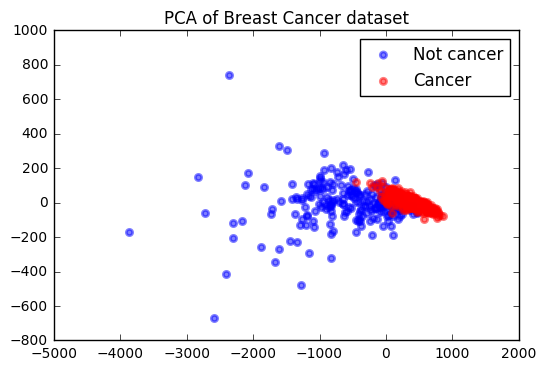

In [15]:
colors = ['blue', 'red']
lw = 2

for color, i, target_name in zip(colors, [0, 1], ['Not cancer', 'Cancer']):
    plt.scatter(X_r[targets == i, 0], X_r[targets == i, 1], color=color, alpha=.5, lw=lw, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
_ = plt.title('PCA of Breast Cancer dataset')

### Different representation of the same data
- It is possible to represent the same data in several representations
- Suppose you have a the results of heart beats 24/7 monitoring from a person (per second):
    - You can use all entries;
    - Average / median per minute / hour / day;
    - Max / min value of hour;
    - Standard deviation / variance;
    - etc.
- Depends on what really matter for your data
    - In some cases, the magnitude doesn't matter. Just the variance
    - Some cases, peak values are the most valuable

### Correlation / covariance between features

- For machine learning, two features highly correlated (linear dependent) are not so valuable;
    - We need more information "variety";
- An investigation about features correlation / covariance can save some processing from classification time and increase your results;
- And **always** remember: **CORRELATION DOES NOT IMPLY CAUSATION**

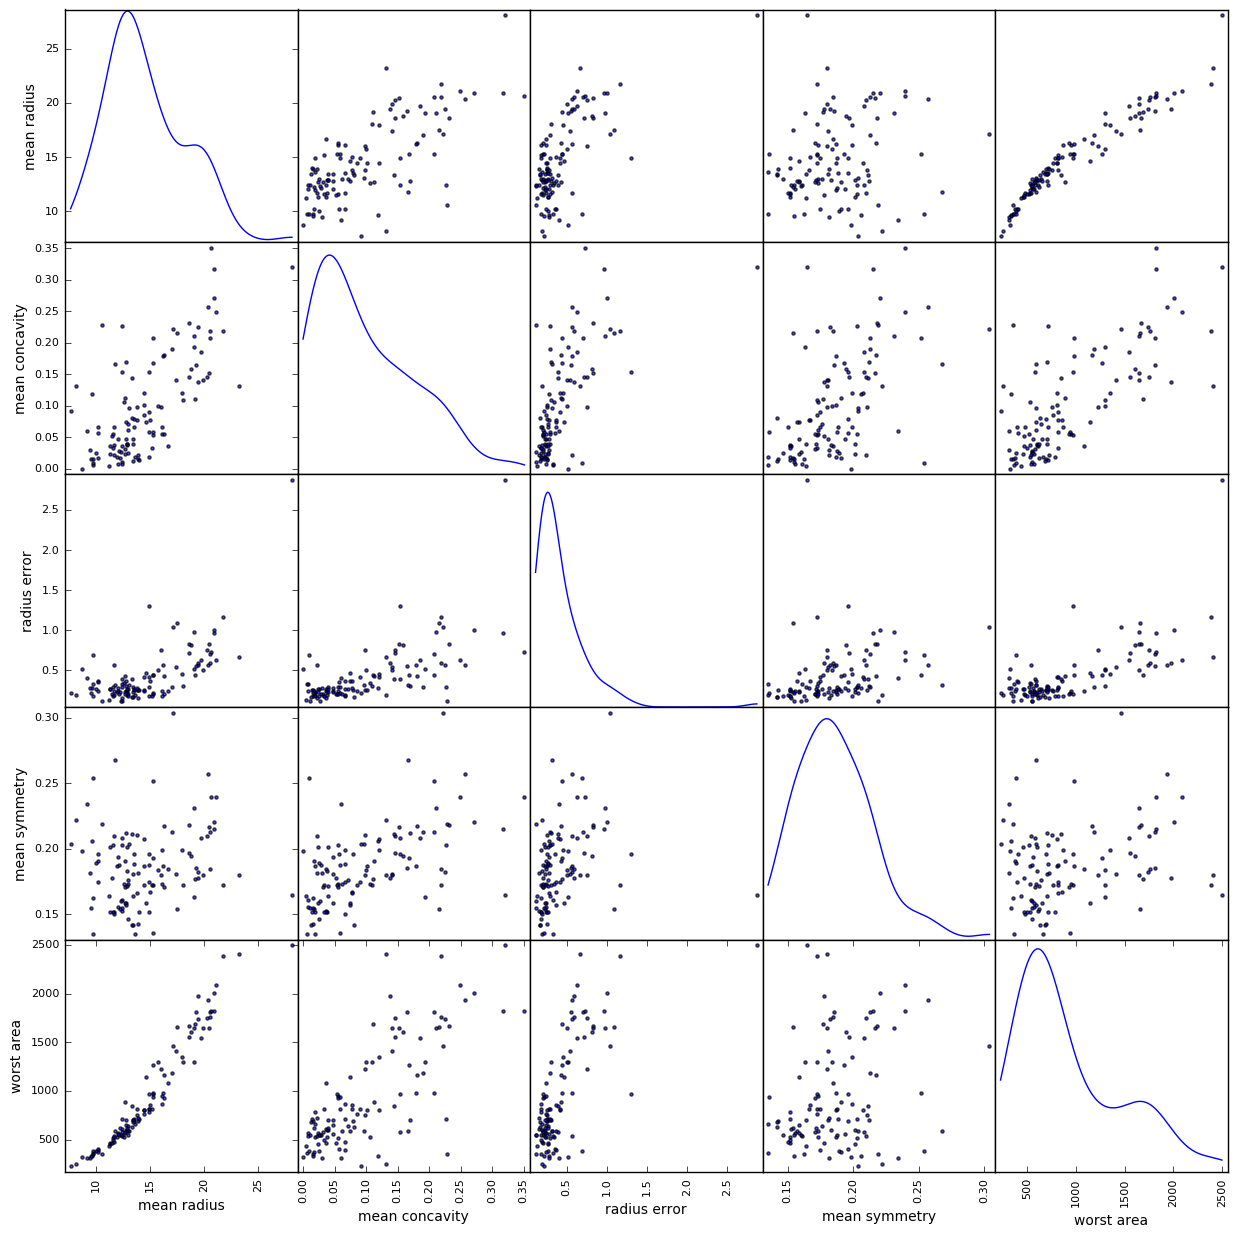

In [16]:
from pandas.tools.plotting import scatter_matrix

df = features[["mean radius", "mean concavity", "radius error", "mean symmetry", "worst area"]].sample(frac=0.2)
_ = scatter_matrix(df, alpha=0.7, figsize=(15, 15), diagonal='kde', )

In [17]:
from sklearn.feature_selection import VarianceThreshold, SelectKBest, SelectFromModel

## Algorithm engineering

### Train / test split

In [18]:
import sklearn

In [19]:
from sklearn.cross_validation import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    features, targets, test_size=0.4, random_state=42
)

### How to measure your algorithm performance

- There are several metrics to measure your algorithm performance
    - KS score
    - AUC / ROC curve
    - **Precision / recall**
    - **Confusion matrix**
    - etc.

#### Confusion matrix & Precision and recall

![title](img/precision_recall.png)

### Chosing your algorithm

- There are a long list of algorithms already available to get started
- You can also develop your own customized one for specific applications
- Ask these two questions first:
    - Should your final model be human readable?
    - What is your SLA of delivering classification results?
- I'm supposing you already know what kind of problem you are solving (classification, regression, ranking, etc);

#### Random Forest
Esemble of Decision Trees

In [21]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### Naive Bayes
Conditional probability model

In [22]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

## Evaluating model performance

In [23]:
from sklearn import metrics

#### Random Forest

In [24]:
y_rf_pred = rf.predict(X_test)

In [25]:
metrics.confusion_matrix(y_test, y_rf_pred)

array([[ 75,   5],
       [  2, 146]])

In [26]:
print metrics.classification_report(y_test, y_rf_pred)

             precision    recall  f1-score   support

          0       0.97      0.94      0.96        80
          1       0.97      0.99      0.98       148

avg / total       0.97      0.97      0.97       228



#### Naive Bayes

In [27]:
y_nb_pred = nb.predict(X_test)

In [28]:
metrics.confusion_matrix(y_test, y_nb_pred)

array([[ 73,   7],
       [  4, 144]])

In [29]:
print metrics.classification_report(y_test, y_nb_pred)

             precision    recall  f1-score   support

          0       0.95      0.91      0.93        80
          1       0.95      0.97      0.96       148

avg / total       0.95      0.95      0.95       228



### Tools for tunning

In [30]:
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint as sp_randint

#### Random Search

In [31]:
param_dist = {
    "max_depth": [3, None],
    "max_features": sp_randint(1, 30),
    "min_samples_split": sp_randint(1, 30),
    "min_samples_leaf": sp_randint(1, 30),
    "bootstrap": [True, False],
    "criterion": ["gini", "entropy"]
}

In [32]:
n_iter_search = 5
random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=n_iter_search
)

In [33]:
_ = random_search.fit(features, targets)

In [42]:
random_search.best_estimator_

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=3, max_features=6, max_leaf_nodes=None,
            min_samples_leaf=6, min_samples_split=11,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [43]:
rf_best_random = random_search.best_estimator_

#### Grid search

In [35]:
param_grid = {
    "max_depth": [3, None],
    "max_features": [1, 3, 10],
    "min_samples_split": [1, 3, 10],
    "min_samples_leaf": [1, 3, 10],
    "bootstrap": [True, False],
    "criterion": ["gini", "entropy"]
}

In [36]:
grid_search = GridSearchCV(rf, param_grid=param_grid)

In [39]:
_ = grid_search.fit(features, targets)

In [40]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=False, class_weight=None,
            criterion='entropy', max_depth=None, max_features=3,
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=1,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [44]:
rf_best_grid = grid_search.best_estimator_

#### Comparing them

Random search

In [49]:
y_rf_random_pred = rf_best_random.predict(X_test)

In [51]:
random_cm = metrics.confusion_matrix(y_test, y_rf_random_pred)
print random_cm

[[ 76   4]
 [  0 148]]


In [52]:
print metrics.classification_report(y_test, y_rf_random_pred)

             precision    recall  f1-score   support

          0       1.00      0.95      0.97        80
          1       0.97      1.00      0.99       148

avg / total       0.98      0.98      0.98       228



Grid search

In [53]:
y_rf_grid_pred = rf_best_grid.predict(X_test)

In [54]:
grid_cm = metrics.confusion_matrix(y_test, y_rf_grid_pred)
print grid_cm

[[ 80   0]
 [  0 148]]


In [55]:
print metrics.classification_report(y_test, y_rf_grid_pred)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        80
          1       1.00      1.00      1.00       148

avg / total       1.00      1.00      1.00       228



## Evaluating (offline) business gains 

Now we need to measure our performance based on the ruler that exactly represents our business goal.

Getting the confusion matrix parameters:

In [56]:
matrix = metrics.confusion_matrix(y_test, y_rf_grid_pred)
print matrix

[[ 80   0]
 [  0 148]]


In [57]:
num_tp = matrix[0][0]
num_fn = matrix[0][1]
num_fp = matrix[1][0]
num_tn = matrix[1][1]

Calculating the operation cost / savings based on classification parameters:

In [58]:
good_clf = operation_cost(num_fn, num_fp, num_tp, num_tn)
print good_clf

-560000


Using the "worst" classifier got by Random Search

In [59]:
bad_matrix = metrics.confusion_matrix(y_test, y_rf_random_pred)
print bad_matrix

[[ 76   4]
 [  0 148]]


In [60]:
bad_num_tp = bad_matrix[0][0]
bad_num_fn = bad_matrix[0][1]
bad_num_fp = bad_matrix[1][0]
bad_num_tn = bad_matrix[1][1]

In [61]:
bad_clf = operation_cost(bad_num_fn, bad_num_fp, bad_num_tp, bad_num_tn)
print bad_clf

-472000


In [62]:
print (good_clf - bad_clf)

-88000


With the worst classifier we lose **US\$ 88000,0** of savings

### Catch up

What to do if learning fails?

- Improve your feature engineering;
- Get more data related to the problem;
- Change the feature representation of the data;
    - Also consider try more sofisticated methods to extract more information of that data
    - Example for text data: string similarity, IDF, Entity recognition, word2vec, etc;
- Change the optimization algorithm used to apply your learning rule;

## Evaluating model lifecycle

- For time based events, you need to know how long is the lifecycle of your model;
    - Get historical data long enough to get some fade;
    - Apply your trained classifier to "future" data and see when it starts to fail significantly;